Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - loss: 0.1167 - val_loss: 0.0231
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0227 - val_loss: 0.0159
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0163 - val_loss: 0.0107
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0104 - val_loss: 0.0049
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0052 - val_loss: 0.0069
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0058 - val_loss: 0.0025
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/

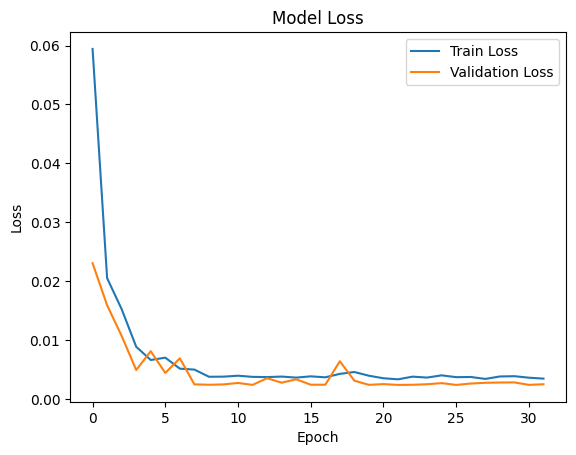

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
[[-1.00947452e+00]
 [-1.07817650e+00]
 [-1.15088964e+00]
 [-1.08797240e+00]
 [-1.01769269e+00]
 [-8.95964444e-01]
 [-7.35269904e-01]
 [-6.18302107e-01]
 [-4.95382845e-01]
 [-4.28472906e-01]
 [-3.73082310e-01]
 [-2.95108706e-01]
 [-2.90934622e-01]
 [-2.12029234e-01]
 [-8.58417973e-02]
 [ 3.04431742e-04]
 [ 8.64827782e-02]
 [ 2.40163505e-01]
 [ 3.37492794e-01]
 [ 4.10321742e-01]
 [ 5.18675029e-01]
 [ 6.31083727e-01]
 [ 6.70102417e-01]
 [ 7.39822447e-01]
 [ 7.80047715e-01]
 [ 7.45429158e-01]
 [ 7.83627689e-01]
 [ 8.44671190e-01]
 [ 8.55506897e-01]
 [ 8.33118975e-01]
 [ 8.83178949e-01]
 [ 9.14678633e-01]
 [ 9.49914813e-01]
 [ 9.69754159e-01]
 [ 9.80564713e-01]
 [ 9.79959548e-01]
 [ 9.15161550e-01]
 [ 8.34995985e-01]
 [ 7.67508149e-01]
 [ 6.11472547e-01]
 [ 5.28650999e-01]
 [ 4.56524938e-01]
 [ 4.06569988e-01]
 [ 2.63509065e-01]
 [ 1.86116397e-01]
 [ 1.78092524e-01]
 [ 4.46992330e-02]
 [-3.33820768e-02]
 [-1.60863936e-01]
 [-2.57923573e-01]
 [-3.237128

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
def create_synthetic_data(num_samples=1000, num_features=1):
    time = np.arange(num_samples)
    data = np.sin(0.1 * time) + 0.1 * np.random.randn(num_samples)  # Example sine wave data with noise
    return data

data = create_synthetic_data()
data = data.reshape(-1, 1)  # Ensure it is 2D for scaling

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Step 3: Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 10
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Step 4: Reshape X to be 3D for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, time steps, features)

# Step 5: Split the data into training and validation sets
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Step 6: Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Use Input layer
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Step 7: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 8: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')  # Change to .keras

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Step 10: Plotting training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Step 11: Predictions (using the last data for future predictions)
# Use X_val to predict future values
predictions = model.predict(X_val)

# Inverse transform to get actual tariff values
predicted_tariffs = scaler.inverse_transform(predictions)

# Optional: Print the predictions
print(predicted_tariffs)


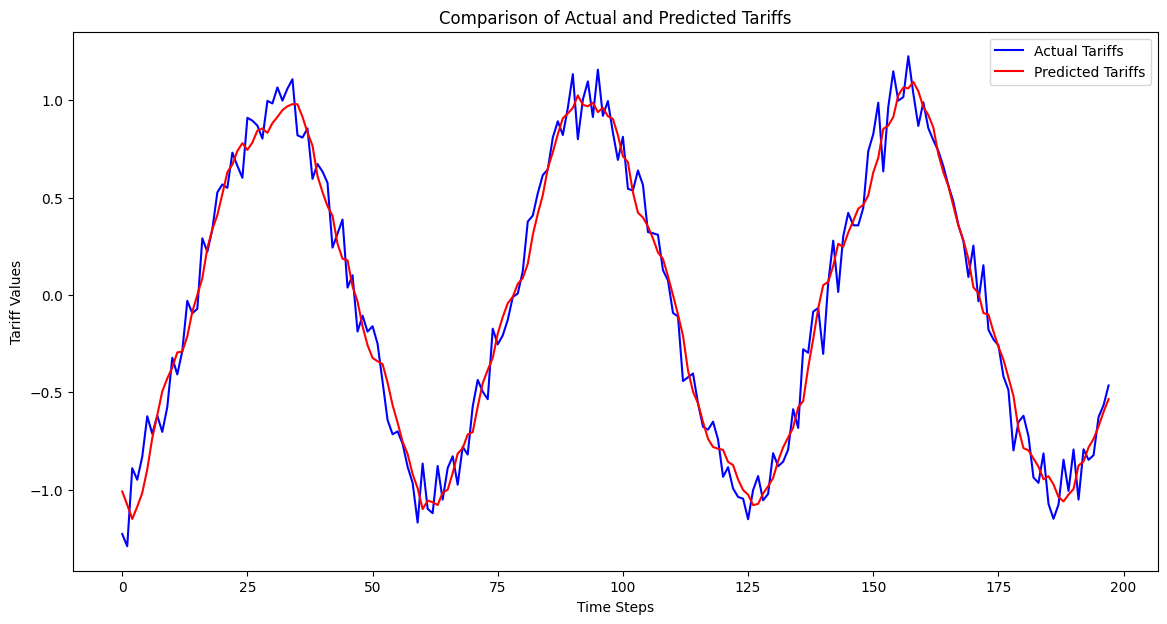

In [ ]:
# After predictions
# Inverse transform the actual values (use y_val for actual tariffs)
actual_tariffs = scaler.inverse_transform(y_val.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(actual_tariffs, label='Actual Tariffs', color='blue')
plt.plot(predicted_tariffs, label='Predicted Tariffs', color='red')
plt.title('Comparison of Actual and Predicted Tariffs')
plt.xlabel('Time Steps')
plt.ylabel('Tariff Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 11: Predictions (using the last data for future predictions)
predictions = model.predict(X_val)

# Inverse transform to get actual tariff values
predicted_tariffs = scaler.inverse_transform(predictions)

# Inverse transform the actual values (use y_val for actual tariffs)
actual_tariffs = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(actual_tariffs, predicted_tariffs)
mse = mean_squared_error(actual_tariffs, predicted_tariffs)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Absolute Error (MAE): 0.10079175498031806
Mean Squared Error (MSE): 0.015422065425363164
Root Mean Squared Error (RMSE): 0.12418560876914508


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Absolute Error (MAE): 0.10079175498031806
Mean Squared Error (MSE): 0.015422065425363164
Root Mean Squared Error (RMSE): 0.12418560876914508


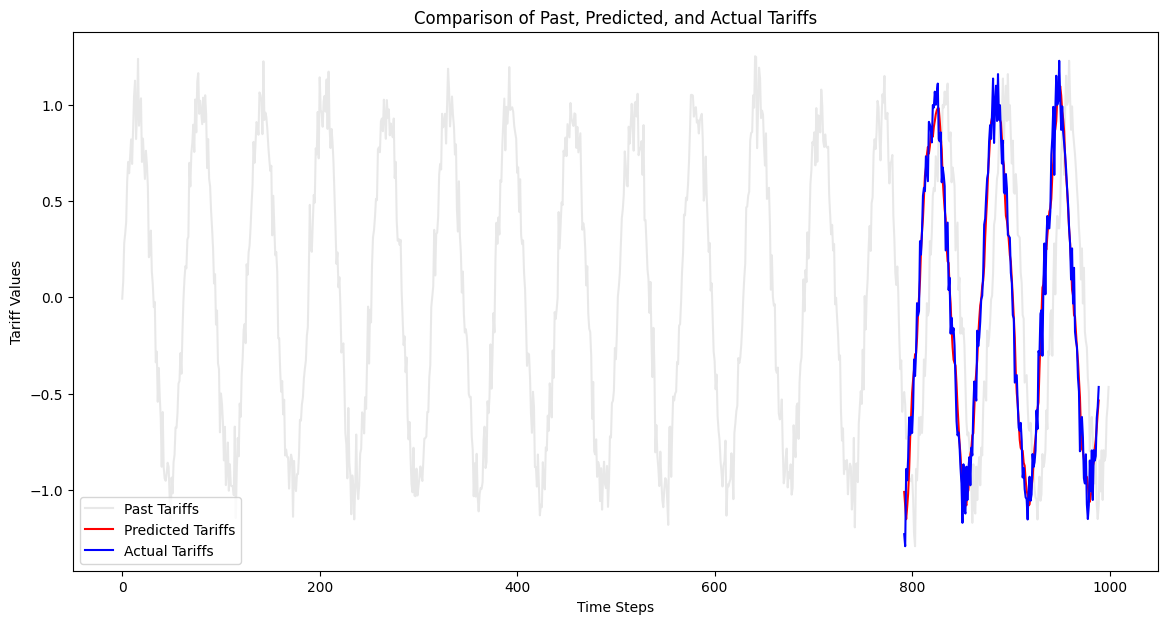

In [ ]:
# Step 11: Predictions (using the last data for future predictions)
predictions = model.predict(X_val)

# Inverse transform to get actual tariff values
predicted_tariffs = scaler.inverse_transform(predictions)

# Inverse transform the actual values (use y_val for actual tariffs)
actual_tariffs = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(actual_tariffs, predicted_tariffs)
mse = mean_squared_error(actual_tariffs, predicted_tariffs)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 12: Plotting Actual vs Predicted Tariffs
plt.figure(figsize=(14, 7))
# Plot actual tariffs from the training set
plt.plot(np.arange(len(data)), scaler.inverse_transform(data_scaled), label='Past Tariffs', color='lightgray', alpha=0.5)
# Plot predicted tariffs
plt.plot(np.arange(train_size, train_size + len(predicted_tariffs)), predicted_tariffs, label='Predicted Tariffs', color='red')
# Plot actual tariffs from the validation set
plt.plot(np.arange(train_size, train_size + len(actual_tariffs)), actual_tariffs, label='Actual Tariffs', color='blue')

plt.title('Comparison of Past, Predicted, and Actual Tariffs')
plt.xlabel('Time Steps')
plt.ylabel('Tariff Values')
plt.legend()
plt.show()


In [ ]:
# Save the model in Keras format
# Save the entire model in Keras format
model.save('best_model.keras')  # Recommended for Keras

# Optionally, save in HDF5 format
model.save('best_model.h5')


In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']